## KNearestNeighbors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#importing data
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# extracting only independent variables columns of Age and Salary of index 2 and 3
X = df.iloc[:,[2,3]].values
# extracting only dependent variable column of purchased with index 4
y = df.iloc[:,4].values

In [8]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# x_train, x_test, y_train, y_test

In [9]:
# Feture Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [10]:
# Fitting Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

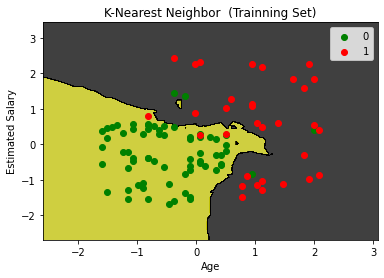

In [13]:
#Visualising the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, 
                               stop = x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, 
                              stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, knc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('y','k')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set== j, 0], x_set[y_set == j, 1],
               color = ListedColormap(('g', 'r'))(i), label = j)
plt.title("K-Nearest Neighbor  (Trainning Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

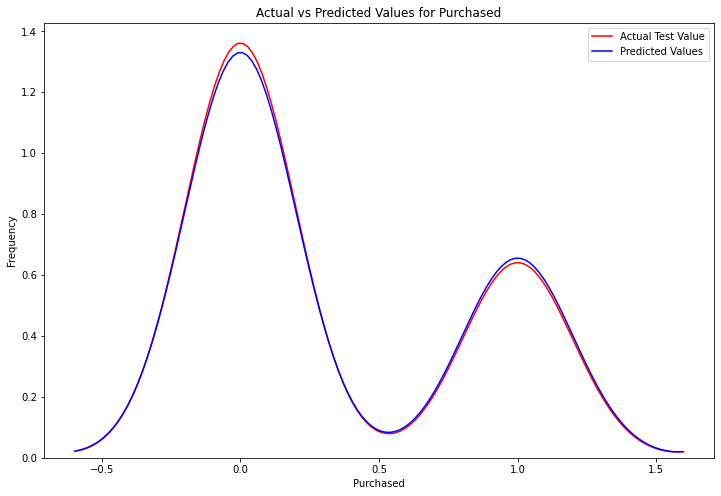

In [15]:
import seaborn as sns

# visualization with density plot
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Value")
ax1 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for Purchased') 
plt.xlabel('Purchased') 
plt.ylabel('Frequency')
plt.show() 
plt.close()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[64  4]
 [ 3 29]]


In [17]:
accuracy_percentage = 93/100
accuracy_percentage

0.93

In [18]:
# Another method of evaluation
from sklearn import metrics
print("SMV's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

SMV's Accuracy:  0.93


In [19]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.9302792022792024

## Another Example about telecommunications
#### About the dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.



In [21]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [22]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [29]:
# extracting only independent variables columns 0-10
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [30]:
# extracting only dependent variable column of purchased with custcat 11
y = df.iloc[:,11].values
y[0:5]

array([1, 4, 3, 1, 3])

In [36]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)
# x_train, x_test, y_train, y_test

In [37]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


In [38]:
# Fitting Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = knc.predict(x_test)
y_pred

array([2, 1, 4, 2, 2, 1, 3, 3, 3, 3, 2, 2, 3, 3, 1, 2, 3, 1, 1, 1, 2, 1,
       1, 1, 1, 4, 4, 2, 3, 1, 1, 1, 3, 3, 2, 1, 1, 4, 3, 3, 3, 1, 1, 3,
       2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 4, 3, 3, 3, 3, 1, 1, 1, 3, 2, 3, 1,
       3, 1, 2, 4, 3, 4, 2, 4, 3, 1, 2, 2, 3, 1, 4, 2, 3, 1, 3, 4, 1, 3,
       2, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2, 1, 3, 2, 3, 1, 1, 2, 1, 4, 3, 4,
       2, 4, 3, 1, 1, 4, 2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 4, 2,
       4, 4, 1, 1, 2, 3, 1, 1, 4, 1, 4, 2, 3, 3, 3, 1, 2, 4, 2, 3, 1, 1,
       4, 3, 3, 1, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 4, 3, 1, 4, 4, 1, 4, 3,
       3, 2, 3, 1, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 4, 3, 3, 1, 3,
       2, 2, 1, 4, 1, 3, 2, 1, 3, 1, 3, 1, 2, 1, 3, 2, 1, 3, 3, 2, 1, 2,
       3, 3, 3, 1, 4, 3, 3, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 1, 1, 4, 1,
       3, 4, 2, 2, 2, 3, 1, 3])

Chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in the test set. Repeat this process, increasing the k, and see which k is the best for the model.

We can calculate the accuracy of KNN for different Ks.

In [41]:
# calculating accuracy for different values of Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.304, 0.32 , 0.324, 0.304, 0.348, 0.348, 0.356, 0.372, 0.364])

#### Plot model accuracy for Different number of Neighbors

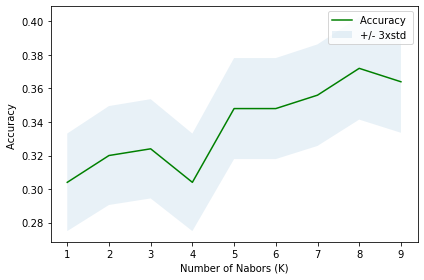

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

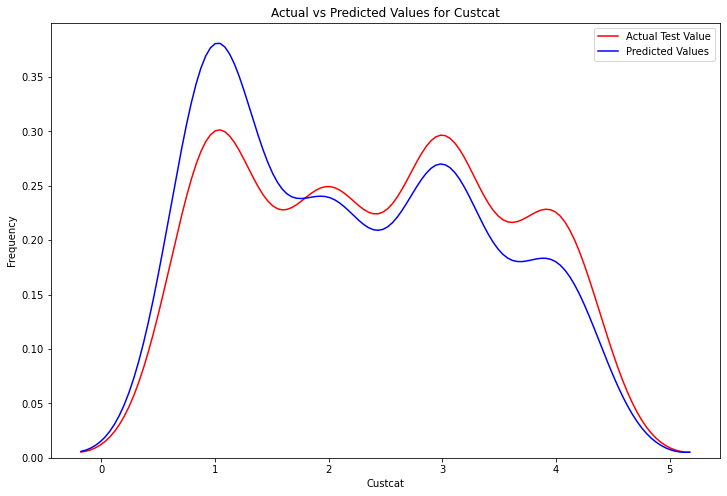

In [44]:
import seaborn as sns
# visualization with density plot
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Value")
ax1 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for Custcat') 
plt.xlabel('Custcat') 
plt.ylabel('Frequency')
plt.show() 
plt.close()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[43 13 11  5]
 [10 15 19 12]
 [21 16 20 12]
 [18  9 13 13]]


In [46]:
accuracy_percentage = 91/250
accuracy_percentage

0.364

In [47]:
# Another method of evaluation
from sklearn import metrics
print("SMV's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

SMV's Accuracy:  0.364


In [48]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.60      0.52        72
           2       0.28      0.27      0.28        56
           3       0.32      0.29      0.30        69
           4       0.31      0.25      0.27        53

    accuracy                           0.36       250
   macro avg       0.34      0.35      0.34       250
weighted avg       0.35      0.36      0.35       250



In [49]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.35433318265863395